# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

Using the default agent the Smartcab does not move at all, i. e. it remains at its initial (random) position over all iterations.

In the initial setup, the agent receives positive or negative rewards (decimal values) that reflects its behaviour with respect to the traffic rules (safety).

Because the agend is not moving, the gets positive rewards when he should not move in his current (initial) state, i. e. on red traffic lights, and negative rewards when he should move, i. e. on green traffic lights without oncomin traffic.

In the initial setup the agent does not get rewards, neither positive nor negative, regarding reliability because he is not enforced to meet a deadline.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In the agent.py file one flag or parameter that could be set is grid_size as a discrete number of intersections that define the grid world. The parameter is set as a tuple of (columns, rows) and used for creation of the Environment object. Another flag within agent.py is epsilon which is the exploration factor of the learning algorithm. It is used during action selection to generate some randomness, i. e. to ensure that the agent keeps exploring the world and not only exploits learned behaviour. Without an exploration factor (or exploration factor = 0) the agent could get stuck in local minima. As a third flag I would like to mention the learning rate alpha. Alpha controls how fast the agent is learning from earned (positive or negative) rewards for the actions chosen. Alpha = 0 would result in no learning, i. e. chosen actions remain according to the initialization of the Q value.

When an agent performs an action, the function act() of the environment.py file is called.

The difference between the functions render_text() and render() within the file simulator.py is, that the former generates log output in text form that is displayed within the console window whereas the latter renders graphics, i. e. the actual game screen.

The function next_waypoint() within the file planner.py will check if the destination is East-West before it checks for North-South.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


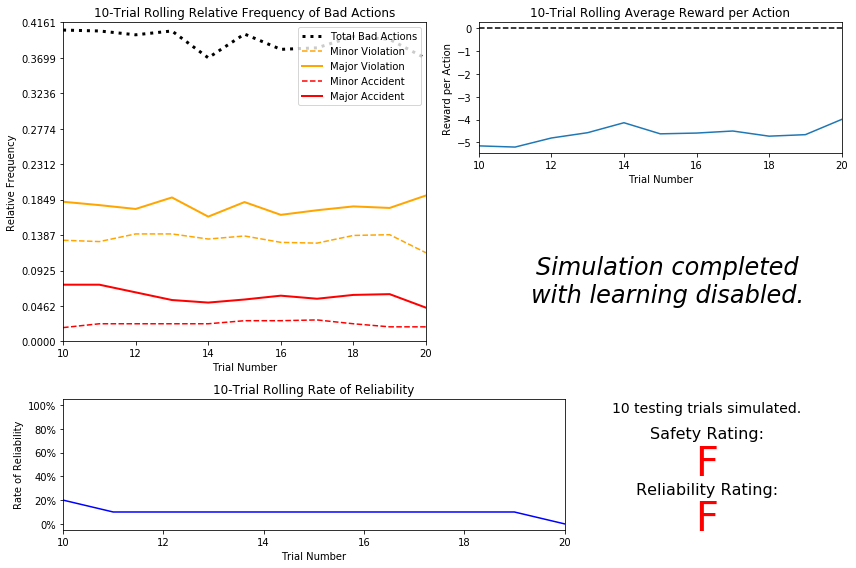

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

According to the "10-Trial Rolling Relative Frequency of Bad Actions" chart the driving agent is making bad decisions with a relative frequency between approx. 37% and 41%. Stacking the curves for minor and major accidents yields the total relative frequency of accidents, i. e. roughly around 10% of the bad decisions cause accidents.

From the chart "10-Trial Rolling Rate of Reliability" it can be observed that the reliability of the agent is always around 10%. Given that the agent is driving randomly, that does not make any sense. One explanation could be, that the agent sometimes reaches his goal on time by chance.

As visualized in the chart "10-Trial Rolling Average Reward per Action" the agent is reiceiving negative decimal rewards between -4 and -5 over all trials, i. e. he is penalized in every trial for its actions. It also can be seen that there is an inverse relationship between the this curve and the "Total Bad Actions" curve from the first chart. Thus, the agent is penalized heavier with increasing relative frequency of bad decisions and vice versa.

Currently the agent is not learning from the feedback he is given to improve over time and therefore the outcome of the results does not change significantly over the trials.

The smartcab would neither be considered safe nor reliable using this driving agent. Both safety and reliability are rated "F" in the visualization above. The rules given in the table at the top of this notebook define when which rating has to be awarded. The reliability should be rated "F" if "Agent fails to reach the destination on time
for at least 60% of trips". That is consistent with the fact that the agent has around 10% rate of reliability all the time. The safety should be rated "F" if "Agent causes at least one major accident, such as driving through a red light with cross-traffic." That is consistent with the fact that the curve for "Major accidents" from the first chart is not zero all the time, i. e. currently it is not zero any time.



-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

A required feature to ensure safety in traffic is 'light' since all safety-related rules in the table consider the traffic lights. There is no safe driving without respecting the traffic lights, i. e. knowing when the lights are green or red.

Another feature that is required for traffic safety is 'oncoming'. Oncoming traffic must be considered if turning left on a green light. Otherwise the driving agent could cause an accident. Again, this is consistent with the rule table above.

The features 'left' and 'right' are not needed to model safe driving in the environment as the intended directions of cross-traffic vehicles do not matter if the smartcab stops on red traffic lights and if we assume that all others do so as well. However, as it is okay in the US to move right on a red light when the cross-traffic from the left is not moving forward, the feature 'left' should be included.

Regarding efficiency the feature 'waypoint' is required, because it is important to inform the agent about the direction in which he has to move to reach his destination. Without it the agent would not have any clue where to go.

While the feature 'waypoint' informs the agent about the right direction to go, the feature 'deadline' would keep him in a hurry and motivates him to reach the goal as fast as possible which is good for efficiency as well. However, there are two reasons why I would not include this feature: First, 'deadline' has many possible values and in combination with the other features that yields to a huge state space with a very long training time. Second, I think 'deadline' is not really needed. Given that the agent tries to always move in the correct direction (due to 'waypoint') and that he does not have the possibility of adjusting his speed, he probably will behave efficient even without informing him about the time left.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

With the features selected in the answer to question 4 the size of the state space is 96, i. e.

- 'waypoint' = 'right' | 'left' | 'forward' = 3 possible states
- 'light' = 'green' | 'red' = 2 possible states
- 'oncoming' = 'none' | 'right' | 'left' | 'forward' = 4 possible states
- 'left' = 'none' | 'right' | 'left' | 'forward' = 4 possible states

That is 3 x 2 x 4 x 4 = 96 possible states. This relatively small state space should be trainable in minutes.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

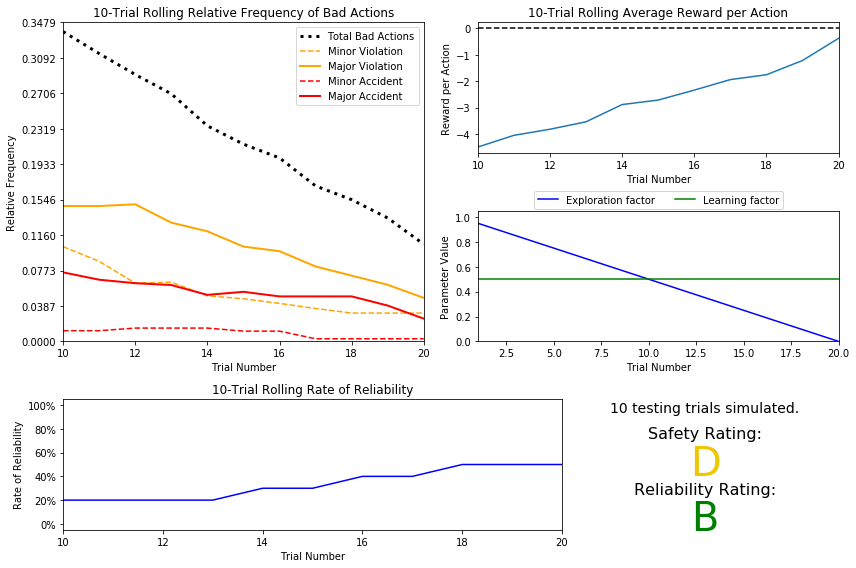

In [12]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

The similarity between the basic driving agent and the default Q-Learning agent is that both are bad at the beginning, i. e. the number of traffic violations/accidents are high and the reliability is low. However, while the basic driving agent reacts only random and does not learn anything from the rewards given to him over time, he stays on that bad level until the simulation ends. After 20 trials the simulation stops training, because the tolerance threshold of epsilon is reached. The default Q-Learning agent does improve over the trials resulting in a 'D' safety and 'B' reliability rating after 20 trials compared to the 'F' ratings of the basic driving agent. The ratings are generated during only 10 testing trials, i. e. the significance of this outcome is somewhat limited. 

Since I was required to implement a linear decaying function for epsilon that reached its training abortion threshold (0.05) after 20 trials the number of training trials for the basic driving agent and the default Q-Learning agent is the same, i. e. I was asked to choose epsilon to force the training to quit after 20 trials when in learning mode. However, the frequency of random behaviour (choose action) decreases with the deacreasing exploration factor over the trials.

The decaying function is correctly visualized in the chart above, as the agent starts with 0.95 exploration factor (nearly random behaviour) and decreases linearly to a 0.00 exploration factor (only exploitation of learned behaviour) after 20 trials.

The number of bad actions decreased very soon from the start showing that the agent is actually learning. The average reward does increase proportional to the decrease of bad actions. However, the behaviour of the agent is not perfect after 20 trials, he still makes bad decisions. But they occur not that often and it also depends on the traffic if a bad decision shows up during a limited testing period. 

Now let's have a closer look at the learned final Q table for the state space ('light', 'oncoming', 'left', 'waypoint'):

('green', 'forward', 'right', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : 0.63
 
This policy is not optimal, because the agent has the maximum reward for going left, even if the waypoint is on the right and he has green light.


('red', 'left', 'forward', 'right')
 -- forward : -19.81
 -- right : 0.00
 -- None : 0.00
 -- left : -19.67
 
This policy is also not optimal because the reward for waiting at a red light and turning right on a red light is equal even if there is forward moving cross-traffic. A major accident could happen.


('green', 'right', None, 'left')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00

For this policy all the Q values are zero, because probably this state has not been reached during training and therefore holds its initial values.

('red', None, 'forward', 'left')
 -- forward : -34.58
 -- right : -9.93
 -- None : 1.37
 -- left : 0.00
 
This policy is reasonable. Waiting on a red light when we want to move left is perfectly correct (None has the highest Q value).

Even if I analyzed only a few snippets of the Q table we can see, that it is still not optimal what is perfectly consistent with the charts above.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

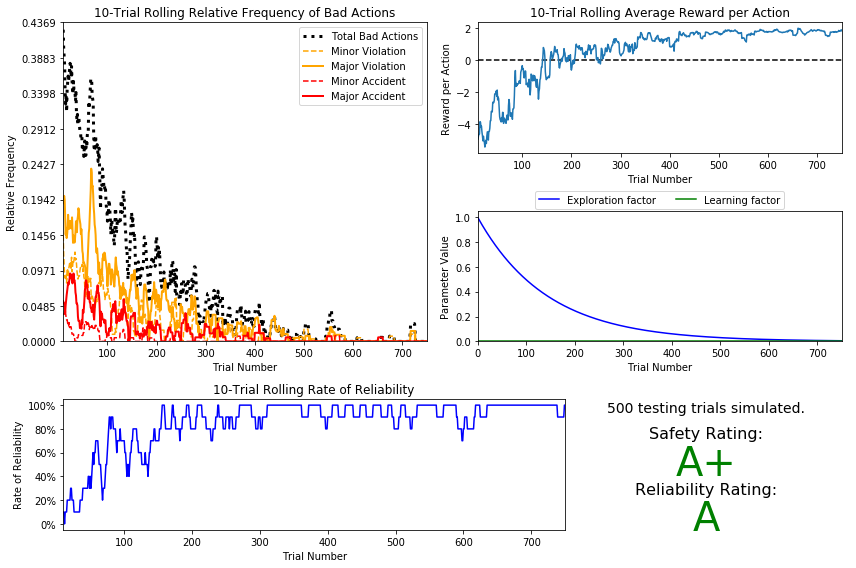

In [14]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

After some experiments I decided to use $$\epsilon = e^{-0.007t}$$ as the decaying function for epsilon, giving an exponential decay of the chance for random actions. I adjusted the epsilon-tolerance to 0.0052475184 resulting in 750 training trials given the function above. I wanted to give enough time (trials) to learn the Q-table robustly. I wanted to emphasize a rather slow learning, so I set the learning rate to 0.0001. I decided to do so, because from other machine learning tasks I know that choosing the learning rate small avoids jumping over minima but as a drawback training takes more time.

The ratings improved regarding safety and regarding reliability. Safety is now at the very best level 'A+' which means that the agent in fact learned the traffic rules. Reliability is not perfect but on a 'A' level. I think that could be due to the fact that we do not consider the deadline in the state space. In addition to this it maybe depends on the traffic, if we could reach the destination on time or not.

I increased the number of test trials to 500. That clearly gives the ratings some strong significance. Therefore I would like to say, that my improved learner successfully learned an appropriate policy. I am clearly satisfied with the safety rating and the reliability rating seems to be okay. But indeed it would be better to achieve 'A+' there as well.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** As I am not an US resident I am not sure if the rules coded within the simulator.py are in consense with the US right-of-way traffic laws but given that they are the rules should be as follows:

When your traffic light (feature 'light') is green, you are allowed to move in the desired direction (feature 'waypoint') whether there is oncoming or crossing traffic and independent of their desired direction of movement. Hence, on a green light, the driving agents optimal policy is to follow its waypoint.

On a red light you have always have to wait except your desired direction (feature 'waypoint') is right and there is no cross-traffic from the left that is goint forward (feature 'left'). In this single case the agent is allowed to move right on a red light. Hence, on a red light the optimal policy is to wait except the agent wants to go right and there is no cross-traffic from the left that wants to go forward. In this case the optimal policy is to follow its waypoint to the right.

According to the 'sim_improved-learning.txt' my agent did learn a suboptimal policy, but it did not learn an optimal policy. The Q table shows that some states probably not have been visited as the Q values of these states are still zero, e. g. - with States = (traffic light, oncomging, left, waypoint):

('green', 'right', 'left', 'left')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 
Possible explanation: State space too big, not enough trials to fill the state space.
 
Others have been visited but the policy is wrong:
 
('red', 'forward', None, 'forward')
 -- forward : -0.03
 -- right : 0.02
 -- None : 0.00
 -- left : -0.01
 
Possible explanation: State space too big, state not visited often enough to converge.

Others are ambigous:

('red', 'left', 'left', 'left')
 -- forward : -0.00
 -- right : 0.00
 -- None : 0.00
 -- left : -0.01
 
Possible explanation: Q values too small, i.e. differ only after the third decimal.

Others are optimal, e. g. 

('red', 'left', None, 'forward')
 -- forward : -0.03
 -- right : 0.00
 -- None : 0.10
 -- left : -0.03
 
It is optimal to wait ('None') on a red light when we want to move forward.

('red', 'left', None, 'right')
 -- forward : -0.02
 -- right : 0.02
 -- None : 0.00
 -- left : -0.01

Is is optimal to turn right on a red light when there no cross-traffic from the left that wants to go forward.

('green', None, None, 'right')
 -- forward : 0.00
 -- right : 0.04
 -- None : -0.01
 -- left : 0.00
 
Is is optimal to turn right on a green light.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:** As the discount factor gamma emphasizes long-term rewards (towards a final goal reward), we have the problem of having no final goal reward (only rewards for taking the next action).

Another problem is that we could only optimize for long-term rewards if the agent's destination and the behaviour of the environment stay the same over the trials. Start and destination of the agent as well as the actions of the other vehicles (and traffic lights) are random, optimization for a long-term reward over multiple trials is not appropriate.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.